### Data Science

Group 17

Daniel Lucas  
Ricardo Nobre  
Ricardo Carvalho  
Diogo Torneiro  
Vasco Pombo  

In [1]:
#basic libraries: numpy and pandasfor data handling, pyplot 
#and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats


#dataset partition
from sklearn.model_selection import train_test_split

#feature selection methods
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#scaling methods and categorical variable encoder
from sklearn.preprocessing import RobustScaler, OneHotEncoder

#model selection 
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

#linear models
from sklearn.linear_model import LogisticRegression, SGDClassifier

#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#k-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer

#principal component analysis
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

#neural network
from sklearn.neural_network import MLPClassifier

#ensemble classifier models
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, \
VotingClassifier, AdaBoostClassifier, StackingClassifier, HistGradientBoostingClassifier, \
ExtraTreesClassifier

#support vector machines
from sklearn.svm import SVC

#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
make_scorer, classification_report, confusion_matrix, f1_score

from itertools import combinations
from collections import Counter

## Importing Data

In [2]:
train_data_original = pd.read_csv('train.csv')
test_data_original = pd.read_csv('test.csv')

df = train_data_original.copy()
df_test = test_data_original.copy()

## Pre Processing

In [3]:
df_original_row_size = df.shape[0]
df_original_columns_size = df.shape[1]

print("Dataframe has", df_original_row_size, "rows and", df_original_columns_size, "columns")

Dataframe has 15589 rows and 22 columns


In [4]:
# Change the data frame index to the customer ID of each entry, rather than the standard index
df.set_index("Cust_ID", inplace = True)
df_test.set_index("Cust_ID", inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0


### Coherence Checks

#### Churn

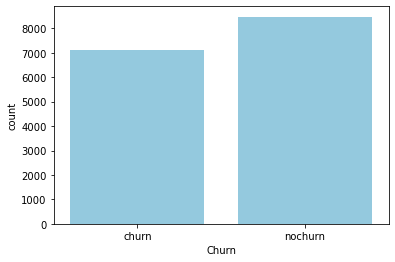

In [7]:
df['Churn'].value_counts()

sns.countplot(df["Churn"], color="skyblue")
plt.show()

Churn is our target variable and it looks somewhat evenly distributed. We will still test with over and under sampled datasets but there is not a huge descrepancy between the values of Churn.

#### Longevity

In [8]:
df['Longevity'].value_counts()

yes    12548
no      2874
y        167
Name: Longevity, dtype: int64

Variable does not look good because we have entries with 'yes' and entries with 'y' which most likely mean the same. Will will transform the entries with 'y' into 'yes'

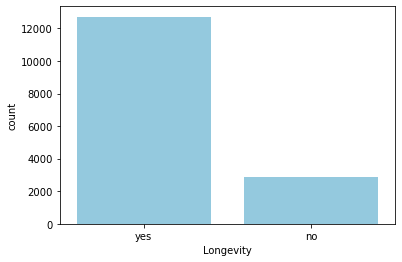

In [9]:
df['Longevity'].replace('y','yes', inplace=True)
df['Longevity'].value_counts()

sns.countplot(df["Longevity"], color="skyblue")
plt.show()

#### Ratings variables

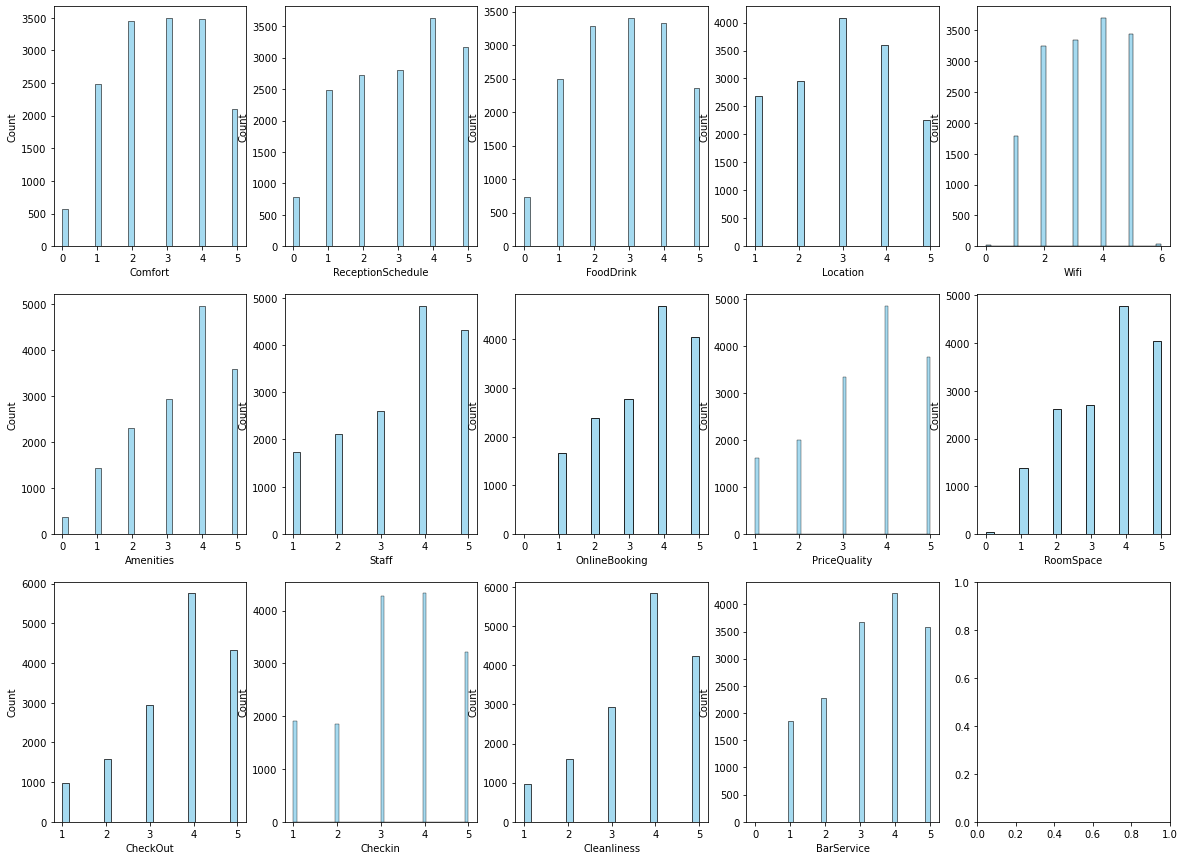

In [10]:
f, axes = plt.subplots(3,5, figsize=(20, 15), squeeze=False)  
sns.histplot(df["Comfort"], color="skyblue", ax=axes[0, 0])
sns.histplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 1])
sns.histplot(df["FoodDrink"], color="skyblue", ax=axes[0, 2])
sns.histplot(df["Location"], color="skyblue", ax=axes[0, 3])
sns.histplot(df["Wifi"], color="skyblue", ax=axes[0, 4])
sns.histplot(df["Amenities"], color="skyblue", ax=axes[1, 0])
sns.histplot(df["Staff"], color="skyblue", ax=axes[1, 1])
sns.histplot(df["OnlineBooking"], color="skyblue", ax=axes[1, 2])
sns.histplot(df["PriceQuality"], color="skyblue", ax=axes[1, 3])
sns.histplot(df["RoomSpace"], color="skyblue", ax=axes[1, 4])
sns.histplot(df["CheckOut"], color="skyblue", ax=axes[2, 0])
sns.histplot(df["Checkin"], color="skyblue", ax=axes[2, 1])
sns.histplot(df["Cleanliness"], color="skyblue", ax=axes[2, 2])
sns.histplot(df["BarService"], color="skyblue", ax=axes[2, 3])

plt.show()

Upon looking at the charts, we noticed that 'Wifi' has values that should not be there, in particular, some surveys were marked with 6 which is not an available rating. 

Since there are only 36 rows with value 6, we will convert them to a 5.

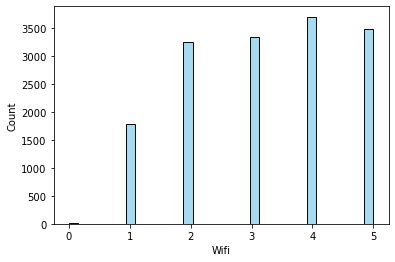

In [11]:
df['Wifi'].replace(6,5, inplace=True)

sns.histplot(df["Wifi"], color="skyblue")
plt.show()

### Duplicate Values

In [12]:
#create duplicate datafranme
duplicates = df.duplicated()

#visualize the duplicates
df[duplicates]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
8196,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9177,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9418,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


In [13]:
df.drop_duplicates(inplace = True)
df.shape

(15586, 21)

### Outliers

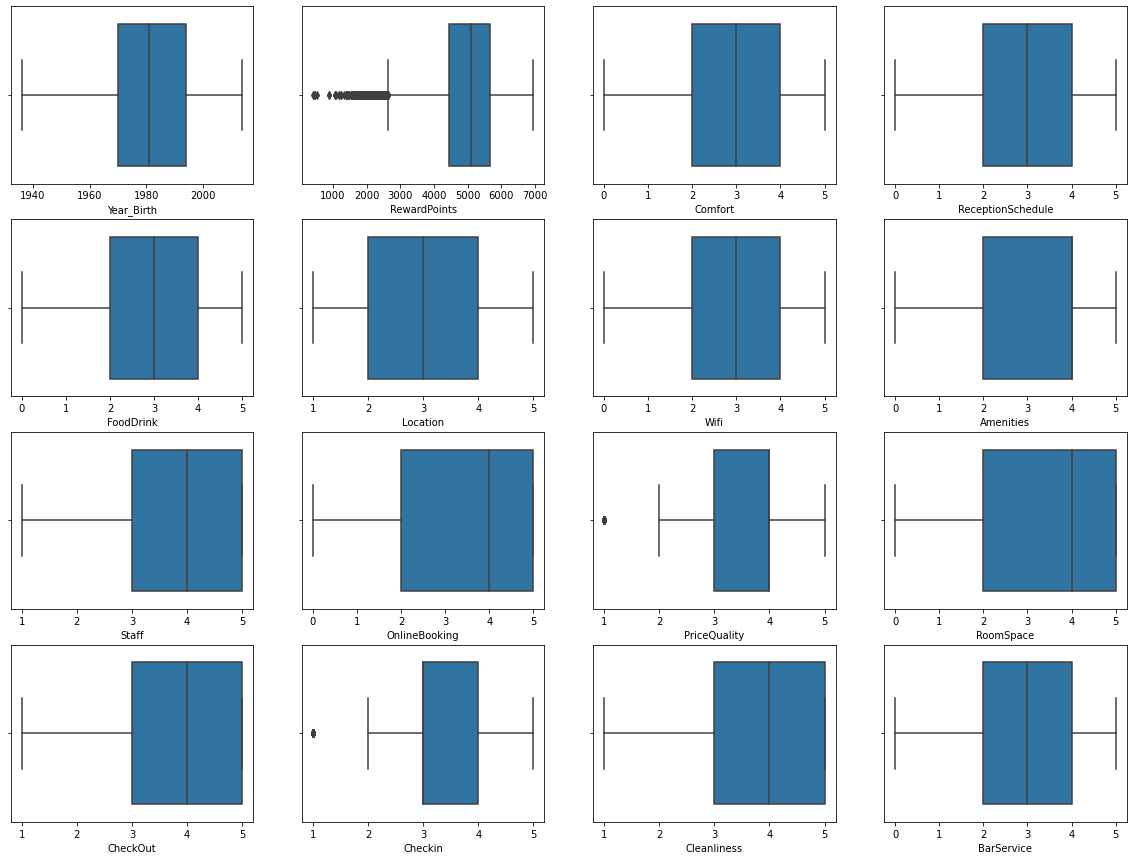

In [14]:
f, axes = plt.subplots(4,4, figsize=(20, 15), squeeze=False)    
sns.boxplot(df["Year_Birth"], ax=axes[0, 0])
sns.boxplot(df["RewardPoints"], ax=axes[0, 1])
sns.boxplot(df["Comfort"], ax=axes[0, 2])
sns.boxplot(df["ReceptionSchedule"], ax=axes[0, 3])
sns.boxplot(df["FoodDrink"], ax=axes[1, 0])
sns.boxplot(df["Location"],  ax=axes[1, 1])
sns.boxplot(df["Wifi"],  ax=axes[1, 2])
sns.boxplot(df["Amenities"],  ax=axes[1, 3])
sns.boxplot(df["Staff"],  ax=axes[2, 0])
sns.boxplot(df["OnlineBooking"],  ax=axes[2, 1])
sns.boxplot(df["PriceQuality"],  ax=axes[2, 2])
sns.boxplot(df["RoomSpace"], ax=axes[2, 3])
sns.boxplot(df["CheckOut"], ax=axes[3, 0])
sns.boxplot(df["Checkin"], ax=axes[3, 1])
sns.boxplot(df["Cleanliness"], ax=axes[3, 2])
sns.boxplot(df["BarService"], ax=axes[3, 3])

plt.show()

In [15]:
#method to return the boundaries of IQR 
def get_IQR_bounds(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    return (lower_bound,upper_bound)

#### Reward Points

In [16]:
df = df[df['RewardPoints'] > get_IQR_bounds(df['RewardPoints'])[0]]

print("There are been",df_original_row_size - df.shape[0], "outliers removed")

There are been 293 outliers removed


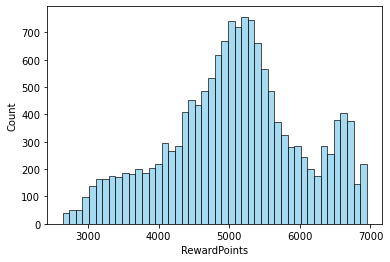

In [17]:
sns.histplot(df["RewardPoints"], color="skyblue")
plt.show()

#### Ratings Variables

After some research and analysis on the subject, we decided not to remove outliers on the two ratings variables that presented outliers in the boxplot visualization. Those are 'PriceQuality' and 'Checkin'. The reason we did not remove them was because they were too many entries that would have to be removed, and if we did, we would effectively be shortening the rating scale for the rating data.

Instead, we will look for straight lining on the ratings entries, meaning people who answered all the answers with the same variable, which can mean they were in a rush and decided to fill the survey as fast as they could.

#### Straight Lining

In [18]:
straight_lining_entries = df[(df['Comfort'] == df['ReceptionSchedule']) & (df['Comfort'] == df['FoodDrink']) & (df['Comfort'] == df['Location']) & (df['Comfort'] == df['Wifi']) & (df['Comfort'] == df['Amenities']) & (df['Comfort'] == df['Staff']) & (df['Comfort'] == df['OnlineBooking']) & (df['Comfort'] == df['PriceQuality']) & (df['Comfort'] == df['RoomSpace']) & (df['Comfort'] == df['CheckOut']) & (df['Comfort'] == df['Checkin']) & (df['Comfort'] == df['Cleanliness']) & (df['Comfort'] == df['BarService'])]

In [19]:
df.drop(straight_lining_entries.index, axis=0, inplace=True)

We found 2 entries that are considered straight lining answers and we will remove them from the data

## Feature Engineering

In [20]:
#churn = 1, nochurn = 0
df['Churn'] = [1 if i == 'churn' else 0 for i in df["Churn"]]

In [21]:
df_data = df.drop(['Churn'], axis=1).copy()
df_target = df['Churn'].copy()

In [22]:
#Method to transform the data

def transform_data(X, age=False):
        print()
        # get all numerical variables
        X_train_num = X[num_vars]
        #
        # get all categorical variables
        X_train_cat = X[cat_vars]
        #df_scaled['Longevity'] = [1 if i == 'yes' else 0 for i in df_scaled["Longevity"]]
        #df_scaled['TypeTravel'] = [1 if i == 'business' else 0 for i in df_scaled["TypeTravel"]]
        
        # fill missing values (KNN Imputer for Year of Birth: first variable of numerical variables)
        k_imputer = round(np.sqrt(len(X_train_num)),0).astype('int32') # 125
        imputer = KNNImputer(n_neighbors=k_imputer, weights="uniform", metric='nan_euclidean')
        imputer.fit(X_train_num)
        data_KNN_train = imputer.transform(X_train_num)
        data_KNN_train = pd.DataFrame(data_KNN_train)
        data_KNN_train[0] = data_KNN_train[0].round(0)
        X_train_num['Year_Birth'] = data_KNN_train[0].values
        if age:
            X_train_num['Age'] = date.today().year - X_train_num['Year_Birth']
            
        
        # Apply scaling to numerical data
        scaler = MinMaxScaler().fit(X_train_num)
        X_train_scaled = pd.DataFrame(scaler.transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index,) # MinMaxScaler in the training data
        
        return X_train_scaled, X_train_cat

In [23]:
#Gender Variable

df_data["Characters"] = df_data["Name"].str[:3]
df_data['Characters'].unique()

df_data.drop(columns=["Characters"], axis=1, inplace=True)
df_data['Gender'] = ['Male' if i == 'Mr.' else 'Female' for i in df_data["Name"].str[:3]]

df_data.drop(columns=['Name'], inplace=True)

In [24]:
cat_vars = ['Gender', 'Longevity', 'TypeTravel', 'RoomType']
num_vars = list(set(df_data.columns) - set(cat_vars))

### Feature Selection

In [25]:
def select_best_features(X, y, splits, age=False):
    sel_log = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    sel_tree = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    sel_forest = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    sel_lasso = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    if age:
        sel_log.append(0)
        sel_tree.append(0)
        sel_forest.append(0)
        sel_lasso.append(0)
        
    skf = StratifiedKFold(n_splits = splits, shuffle=True, random_state=42)
    counter = 0
    for train_index, val_index in skf.split(X, y):
        counter +=1
        print('')
        print('--------------------------------------------------------')
        print('SPLIT ', counter)
        print('--------------------------------------------------------')
        print('')
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        
        X_train_scaled, X_train_cat = transform_data(X_train, age)
        X_val_scaled, X_val_cat = transform_data(X_val, age)

        # Check which features to use using RFE and Logistic Regression
        print('')
        print('----------------- RFE ----------------------')
        model = LogisticRegression()
        rfe = RFE(estimator = model, n_features_to_select = 5)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        sel_log=np.add(sel_log,list(map(int, selected_features)))

         # Check which features to use using RFE and decision tree
        model = DecisionTreeClassifier()
        rfe = RFE(estimator = model, n_features_to_select = 5)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        sel_tree=np.add(sel_tree,list(map(int, selected_features)))
        
        # Check which features to use using RFE and random forest
        model = RandomForestClassifier()
        rfe = RFE(estimator = model, n_features_to_select = 5)
        X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
        selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
        sel_forest=np.add(sel_forest,list(map(int, selected_features)))

        #Lasso
        reg = LassoCV()
        reg.fit(X=X_train_scaled, y=y_train.replace('nochurn',0).replace('churn',1))
        print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
        print("Best score using built-in LassoCV: %f" %reg.score(X = X_train_scaled,y = y_train.replace('nochurn',0).replace('churn',1)))
        coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
        sel_lasso=np.add(sel_lasso,coef.values)
        
        # Check which features to use using Chi-Square
        print('')
        print('----------------- CHI-SQUARE ----------------------')
        def TestIndependence(X,y,var,alpha=0.05):        
            dfObserved = pd.crosstab(y,X) 
            chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
            if p<alpha:
                result="{0} is IMPORTANT for Prediction".format(var)
            else:
                result="{0} is NOT important for Prediction. (Discard {0} from model)".format(var)
            print(result)
        
        for var in X_train_cat:
            TestIndependence(X_train_cat[var],y_train, var)
        
        sel_lasso = sel_lasso/splits
        
        if age==True:
            num_vars.append("Age")
         
        final = pd.DataFrame(np.array([sel_log,sel_tree,sel_forest,sel_lasso]),\
                         columns=set(num_vars),index=['Logistic Regression','Decision Tree','Random Forest','Lasso'])
                             
    print(final.T)

In [278]:
select_best_features(df_data, df_target, 5)


--------------------------------------------------------
SPLIT  1
--------------------------------------------------------




----------------- RFE ----------------------
Best alpha using built-in LassoCV: 0.000070
Best score using built-in LassoCV: 0.407066

----------------- CHI-SQUARE ----------------------
Gender is IMPORTANT for Prediction
Longevity is IMPORTANT for Prediction
TypeTravel is IMPORTANT for Prediction
RoomType is IMPORTANT for Prediction

--------------------------------------------------------
SPLIT  2
--------------------------------------------------------




----------------- RFE ----------------------
Best alpha using built-in LassoCV: 0.000150
Best score using built-in LassoCV: 0.409826

----------------- CHI-SQUARE ----------------------
Gender is IMPORTANT for Prediction
Longevity is IMPORTANT for Prediction
TypeTravel is IMPORTANT for Prediction
RoomType is IMPORTANT for Prediction

--------------------------------------------------------
SPLIT  3
-------

In [26]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True,  fmt='.1')
    plt.show()

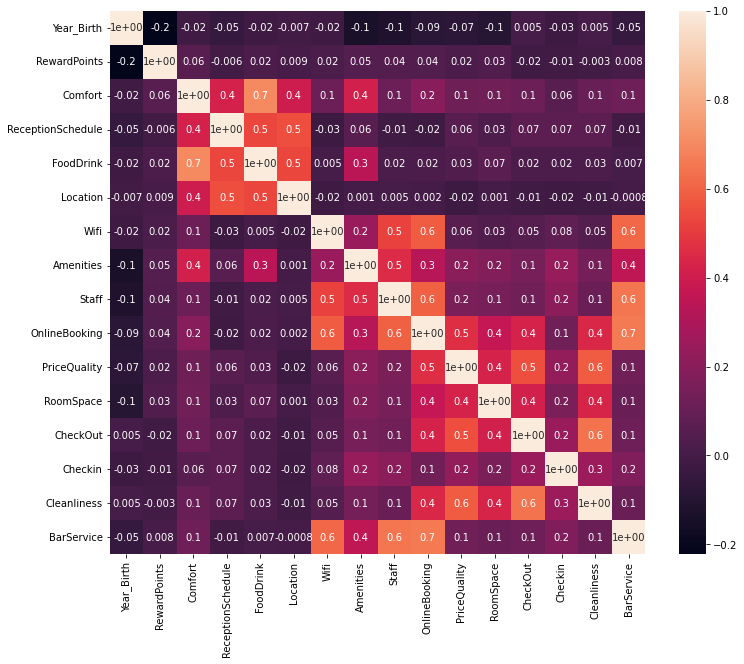

In [27]:
cor_heatmap(df_data.corr(method = 'spearman'))

| Predictor | RFE Logistic | RFE Decision Tree | RFE Random Forest | Lasso | Correlation | Include in the model?
| --- | --- | --- | --- |--- | --- | --- |
| Year_Birth        | Discard | Keep | Discard | Keep? | Keep |  Keep?
| RewardPoints      | Discard | Discard | Discard | Keep? | Keep |  Discard
| Comfort           | Discard | Keep | Keep | Keep | Discard | Keep?
| ReceptionSchedule | Discard | Discard | Discard | Keep? | Keep | Discard
| FoodDrink         | Keep | Keep | Keep | Discard | Keep | Keep 
| Location          | Keep | Discard | Discard | Keep | Keep | Keep
| Wifi              | Keep | Keep | Keep | Keep | Keep | Keep
| Amenities         | Discard | Keep | Discard | Keep? | Keep | Keep
| Staff             | Discard | Discard | Discard | Keep? | Discard | Discard
| OnlineBooking     | Keep | Keep | Keep | Keep | Discard | Keep
| PriceQuality      | Discard | Discard | Discard | Discard | Keep | Discard
| RoomSpace         | Discard | Discard | Discard | Discard | Keep | Discard
| CheckOut          | Keep | Discard | Discard | Keep? | Keep | Keep?
| CheckIn           | Discard | Keep | Keep | Keep? | Keep | Keep
| Cleanliness       | Keep | Discard | Discard | Keep? | Keep | Keep
| BarService        | Discard | Discard | Discard | Keep? | Keep | Discard

#### Numerical variables to keep
- Year_birth
- Comfort
- FoodDrink
- Location
- Wifi
- Amenities
- PriceQuality
- CheckOut
- CheckIn
- Cleanliness

#### Categorical variables to keep
From the Chi-Square, every single variable was marked as important

In [28]:
selected_cat = ['Longevity','TypeTravel','RoomType','Gender']
selected_num = ['Year_Birth', 'Comfort', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'PriceQuality','CheckOut', 'Checkin', 'Cleanliness']

In [29]:
features_to_drop = ['RewardPoints','ReceptionSchedule',
       'Staff', 'OnlineBooking', 'RoomSpace', 'BarService']

In [30]:
df_data.drop(columns = features_to_drop, inplace = True)

### Creating Dummies

In [31]:
#yes = 1, no = 0
df_data['Longevity'] = [1 if i == 'yes' else 0 for i in df_data["Longevity"]]

#business = 1, leisure = 0
df_data['TypeTravel'] = [1 if i == 'business' else 0 for i in df_data["TypeTravel"]]

#Male = 1, Female = 0
df_data['Gender'] = [1 if i == 'Male' else 0 for i in df_data["Gender"]]

df_data = pd.get_dummies(df_data, drop_first = True)

### Scaling Data

In [32]:
scaler = MinMaxScaler()
df_data = pd.DataFrame(scaler.fit_transform(df_data), index=df_data.index, columns = df_data.columns)

### Modelling

In [33]:
def compare_models(X, y, model):
    # apply StratifiedK-Fold
    skf = StratifiedKFold(n_splits = 5)
    score_train = []
    score_val = []
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # This time we are going to use validation to check overfitting 
        # so we need also to make all the needed changes in the validation
        
        # fill missing values (mean in numerical data, mode in categorical data)
        #median_age_train = X_train['age'].median() # age is no longer used
        #X_train['age'].fillna(median_age_train, inplace = True)
        #X_val['age'].fillna(median_age_train, inplace = True)
        k_imputer = round(np.sqrt(len(X_train[selected_num])),0).astype('int32') # 125
        imputer = KNNImputer(n_neighbors=k_imputer, weights="uniform", metric='nan_euclidean')
        imputer.fit(X_train[selected_num])
        data_KNN_train = imputer.transform(X_train[selected_num])
        data_KNN_train = pd.DataFrame(data_KNN_train)
        data_KNN_train[0] = data_KNN_train[0].round(0)
        X_train['Year_Birth'] = data_KNN_train[0].values
        # Use Train Imputer for Validation Data
        data_KNN_val = imputer.transform(X_val[selected_num])
        data_KNN_val = pd.DataFrame(data_KNN_val)
        data_KNN_val[0] = data_KNN_val[0].round(0)
        X_val['Year_Birth'] = data_KNN_val[0].values
        
        
        # Data Scaling
        # Apply MinMaxScaler
        #scaler = MinMaxScaler().fit(X_train[selected_num])
        #X_train_scaled = scaler.transform(X_train[selected_num]) 
        #X_val_scaled = scaler.transform(X_val[selected_num]) # Scaling with 'scaler' from train data

        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return str(avg_train) + '+/-' + str(std_train),str(avg_val) + '+/-' + str(std_val)

In [34]:
def show_results(df, X, y, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        avg_train, avg_test = compare_models(X, y, arg)
        # store the results in the right row
        df.iloc[count] = avg_train, avg_test
        count+=1
    
    return df

In [288]:
model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_GB = GradientBoostingClassifier()
model_HGB = HistGradientBoostingClassifier()
model_AB = AdaBoostClassifier()
model_SVC = SVC()
model_G = GaussianNB()
model_ET = ExtraTreesClassifier()
model_RF = RandomForestClassifier()
model_DT = DecisionTreeClassifier()
model_MLP = MLPClassifier()

df = pd.DataFrame(columns = ['Train','Validation'], index = 
                  ['Logistic Regression','KNN', 'GradientBoost',
                   'HistGradientBoost', 'AdaBoost', 
                  'SVC', 'Gaussian', 'ExtraTrees',
                  'RandomForest', 'DecisonTree',
                  'MLPClassifier'])
show_results(df, df_data, df_target, 
             model_LR, model_KNN, model_GB, 
             model_HGB, model_AB, model_SVC,
             model_G, model_ET, model_RF,
             model_DT, model_MLP)

,Train,Validation
Logistic Regression,0.803+/-0.0,0.801+/-0.01
KNN,0.922+/-0.0,0.885+/-0.01
GradientBoost,0.91+/-0.0,0.906+/-0.0
HistGradientBoost,0.955+/-0.0,0.932+/-0.0
AdaBoost,0.872+/-0.0,0.872+/-0.0
SVC,0.912+/-0.0,0.903+/-0.01
Gaussian,0.805+/-0.0,0.804+/-0.01
ExtraTrees,0.998+/-0.0,0.925+/-0.0
RandomForest,0.998+/-0.0,0.925+/-0.0
DecisonTree,0.998+/-0.0,0.901+/-0.0


In [ ]:


Daniel - Extra Trees, Decision Trees, log reg
Vasco = MLP, Random FOrest, Gaussian
Diogo = KNN
Ricardo N = Gradboost
Ricardo -  histgradboo, adaboo, svc

### Modelling and Predictions

In [33]:
#First we must transform the test dataset to be able to be used in modeling

#drop variables
df_test.drop(columns=features_to_drop, inplace = True)

#feature enginering
df_test["Characters"] = df_test["Name"].str[:3]
df_test['Characters'].unique()

df_test.drop(columns=["Characters"], axis=1, inplace=True)
df_test['Gender'] = ['Male' if i == 'Mr.' else 'Female' for i in df_test["Name"].str[:3]]

df_test.drop(columns=['Name'], inplace=True)

#dummies
#yes = 1, no = 0
df_test['Longevity'] = [1 if i == 'yes' else 0 for i in df_test["Longevity"]]

#business = 1, leisure = 0
df_test['TypeTravel'] = [1 if i == 'business' else 0 for i in df_test["TypeTravel"]]

#Male = 1, Female = 0
df_test['Gender'] = [1 if i == 'Male' else 0 for i in df_test["Gender"]]

df_test = pd.get_dummies(df_test, drop_first = True)

#scaling
scaler = MinMaxScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test), index=df_test.index, columns = df_test.columns)

In [34]:
def score(y_val,y_pred):
    '''Shows the micro f score, then a complete analysis,
    with precision, recall, f1-score, and support, for both
    training and validation sets, after that the accuracy, and
    finally the base and weighted averages
    
    Requires: the target from the validation dataset 
    and the corresponding prediction
    '''
    print('Micro f1 score:', f1_score(y_val, y_pred, average='micro'))
    #calculating the micro f1 score
    print('\nResults on the data set:')
    print(classification_report(y_true = y_val, y_pred = y_pred))

Split into train and test

In [35]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer_matrix = imputer.fit_transform(df_data)

data_cleaned = pd.DataFrame(data=imputer_matrix, columns = df_data.columns, index = df_data.index)
df_data['Year_Birth'] = data_cleaned['Year_Birth']

In [36]:
X_train, X_val, y_train, y_val = train_test_split(df_data, df_target, test_size=0.3, random_state=123)


#### Gradient Boosting

In [39]:
clf =  GradientBoostingClassifier()

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

-------MODEL WITH THE SELECTED FEATURES-------
Score on train: 0.90226 (+/- 0.01)
Micro f1 score: 0.9163216387012421

Results on the data set:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2492
           1       0.91      0.91      0.91      2097

    accuracy                           0.92      4589
   macro avg       0.92      0.92      0.92      4589
weighted avg       0.92      0.92      0.92      4589



In [ ]:
 def search_gradclass(x_train, y_train, x_val, y_val):
     '''Determines the optimal parameters for a gradient boosting classifier for
     the input data, and prints the optimal gradient boosting classifier, a full
     list of its parameters, and the cross-validation scores for both
     training and validation data
    
     Requires: train and validation data, both features and target in both cases
     '''
     model=GradientBoostingClassifier(random_state=15)
     # grid search - find best parameters
     parameters = {'n_estimators':[10,50,100,200],
     'criterion':['gini','entropy'],
     'max_depth':[5,10],
     'min_samples_split':[3,7],
     'min_samples_leaf':[1,2],
     'max_features':['auto','log2',None]}
                  
     clf = GridSearchCV(model, param_grid=parameters)
     grid_search = clf.fit(x_train, y_train)
     # mark result
     print("Best score: %0.3f" % grid_search.best_score_)
     print(grid_search.best_estimator_)

     # best prarams
     print('best prarams:', clf.best_params_)

     print('-----grid search end------------')
     print('on all train set')
     scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=3, scoring='f1')
     print(scores.mean(), scores)
     print('on test set')
     scores = cross_val_score(grid_search.best_estimator_, x_val, y_val, cv=3, scoring='f1')
     print(scores.mean(), scores)

#### Random Forest

In [59]:
clf =  RandomForestClassifier(random_state=15)

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

-------MODEL WITH THE SELECTED FEATURES-------
Score on train: 0.92367 (+/- 0.01)
Micro f1 score: 0.9383307910220091

Results on the data set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2492
           1       0.93      0.93      0.93      2097

    accuracy                           0.94      4589
   macro avg       0.94      0.94      0.94      4589
weighted avg       0.94      0.94      0.94      4589



In [67]:
 def search_cv_rf(x_train, y_train, x_val, y_val):
     '''Determines the optimal parameters for a random forest classifier for
     the input data, and prints the optimal random forest classifier, a full
     list of its parameters, and the cross-validation scores for both
     training and validation data
    
     Requires: train and validation data, both features and target in both cases
     '''
     model=RandomForestClassifier(random_state=15)
     # grid search - find best parameters
     parameters = {'n_estimators':[10,50,100,200],
     'criterion':['gini','entropy'],
     'max_depth':[5,10],
     'min_samples_split':[3,7],
     'min_samples_leaf':[1,2],
     'max_features':['auto','log2',None]}
                  
     clf = GridSearchCV(model, param_grid=parameters)
     grid_search = clf.fit(x_train, y_train)
     # mark result
     print("Best score: %0.3f" % grid_search.best_score_)
     print(grid_search.best_estimator_)

     # best prarams
     print('best prarams:', clf.best_params_)

     print('-----grid search end------------')
     print('on all train set')
     scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=3, scoring='f1')
     print(scores.mean(), scores)
     print('on test set')
     scores = cross_val_score(grid_search.best_estimator_, x_val, y_val, cv=3, scoring='f1')
     print(scores.mean(), scores)

In [68]:
search_cv_rf(X_train, y_train, X_val, y_val)

Best score: 0.921
RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=3,
                       n_estimators=200, random_state=15)
best prarams: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
-----grid search end------------
on all train set
0.9130192552864344 [0.91219512 0.91799266 0.90886999]
on test set
0.9036707638341782 [0.89660266 0.90662865 0.90778098]


In [70]:
clf =  RandomForestClassifier(criterion= 'gini', max_depth= 10, max_features= None, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 200)

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

-------MODEL WITH THE SELECTED FEATURES-------
Score on train: 0.91372 (+/- 0.00)
Micro f1 score: 0.9315755066463282

Results on the data set:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2492
           1       0.92      0.93      0.93      2097

    accuracy                           0.93      4589
   macro avg       0.93      0.93      0.93      4589
weighted avg       0.93      0.93      0.93      4589



In [72]:
y_pred = clf.predict(df_test)

In [73]:
df_test['Churn']=y_pred.copy()
df_test[['Churn']].to_csv('sub.csv')

#### MLP

In [74]:
clf =  MLPClassifier(random_state=15)

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

-------MODEL WITH THE SELECTED FEATURES-------
Score on train: 0.90817 (+/- 0.01)
Micro f1 score: 0.9278709958596644

Results on the data set:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2492
           1       0.92      0.92      0.92      2097

    accuracy                           0.93      4589
   macro avg       0.93      0.93      0.93      4589
weighted avg       0.93      0.93      0.93      4589



In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [76]:
 def search_mlp(x_train, y_train, x_val, y_val):
     '''Determines the optimal parameters for a mlp  classifier for
     the input data, and prints the optimal mlp classifier, a full
     list of its parameters, and the cross-validation scores for both
     training and validation data
    
     Requires: train and validation data, both features and target in both cases
     '''
     model=MLPClassifier(random_state=15)
     # grid search - find best parameters
     parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],}
                  
     clf = GridSearchCV(model, param_grid=parameters)
     grid_search = clf.fit(x_train, y_train)
     # mark result
     print("Best score: %0.3f" % grid_search.best_score_)
     print(grid_search.best_estimator_)

     # best prarams
     print('best prarams:', clf.best_params_)

     print('-----grid search end------------')
     print('on all train set')
     scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=3, scoring='f1')
     print(scores.mean(), scores)
     print('on test set')
     scores = cross_val_score(grid_search.best_estimator_, x_val, y_val, cv=3, scoring='f1')
     print(scores.mean(), scores)

In [77]:
search_mlp(X_train, y_train, X_val, y_val)

Best score: 0.935
MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              random_state=15)
best prarams: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
-----grid search end------------
on all train set
0.9242282600433298 [0.92246399 0.93123651 0.91898428]
on test set
0.9047132405259513 [0.8892261  0.90664781 0.91826581]


In [78]:
clf =  MLPClassifier(activation= 'tanh', alpha= 0.05, hidden_layer_sizes= (50, 100, 50), learning_rate= 'constant', solver= 'adam')

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

-------MODEL WITH THE SELECTED FEATURES-------
Score on train: 0.92479 (+/- 0.01)
Micro f1 score: 0.9383307910220091

Results on the data set:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2492
           1       0.94      0.93      0.93      2097

    accuracy                           0.94      4589
   macro avg       0.94      0.94      0.94      4589
weighted avg       0.94      0.94      0.94      4589



In [80]:
del df_test['Churn']
y_pred = clf.predict(df_test)

df_test['Churn']=y_pred.copy()
df_test[['Churn']].to_csv('sub.csv')

### Submission

In [ ]:
df_test=df_test[df_data.columns]
#the testing dataframe is cropped: only the columns used in
#training are left
y_final =  clf.predict(df_test)
#predicts the target for the test data
df_test['Churn']=y_final.copy()
df_test[['Churn']].to_csv('sub.csv')
#writes the results of the prediction in a csv file